In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/BirdSpecies.zip'


Archive:  /content/drive/MyDrive/BirdSpecies.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: tes

In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))  #--> (0 to 255) convert to (0 to 1)
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
# CNN

from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 131s 7s/step - loss: 5.5296 - accuracy: 0.0667 - val_loss: 2.7745 - val_accuracy: 0.0510
Epoch 2/10
19/19 [==============================] - 126s 7s/step - loss: 2.7740 - accuracy: 0.0800 - val_loss: 2.8919 - val_accuracy: 0.0191
Epoch 3/10
19/19 [==============================] - 127s 7s/step - loss: 2.7695 - accuracy: 0.0533 - val_loss: 2.7688 - val_accuracy: 0.1274
Epoch 4/10
19/19 [==============================] - 128s 7s/step - loss: 2.7625 - accuracy: 0.1400 - val_loss: 2.9806 - val_accuracy: 0.0446
Epoch 5/10
19/19 [==============================] - 133s 7s/step - loss: 2.7868 - accuracy: 0.1333 - val_loss: 2.7652 - val_accuracy: 0.1274
Epoch 6/10
19/19 [==============================] - 128s 7s/step - loss: 2.7589 - accuracy: 0.1400 - val_loss: 2.7632 - val_accuracy: 0.1274
Epoch 7/10
19/19 [==============================] - 104s 6s/step - loss: 2.7504 - accuracy: 0.1200 - val_loss: 2.7734 - val_accuracy: 0.0892
Epoch 8/10
19

In [ ]:
#testing
import numpy as np
from tensorflow.keras.preprocessing import image


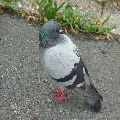

In [ ]:
img = image.load_img('/content/P1050044.jpg',target_size=(120,120))
img

In [ ]:
# Testing 1
img1 = image.load_img('/content/P1050044.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 167ms/step
8
himgri


In [ ]:
# Testing 3
img3 = image.load_img('/content/_DSC0085.jpg',target_size=(120,120))
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 44ms/step
8
himgri


In [ ]:
# Testing 3
img4 = image.load_img('/content/_D32_12427.jpg',target_size=(120,120))
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4,axis=0)
pred = np.argmax(model.predict(img4))
print(pred)
print(output[pred])

1/1 [==============================] - 0s 31ms/step
8
himgri


In [ ]:
model.save('birds1.h5')

In [ ]:
#case 1: adding more feature extraction layers
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 36)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=15)

Epoch 1/15
19/19 [==============================] - 133s 7s/step - loss: 2.7496 - accuracy: 0.1333 - val_loss: 2.7310 - val_accuracy: 0.1656
Epoch 2/15
19/19 [==============================] - 128s 7s/step - loss: 2.6768 - accuracy: 0.2067 - val_loss: 2.6568 - val_accuracy: 0.2038
Epoch 3/15
19/19 [==============================] - 127s 7s/step - loss: 2.6239 - accuracy: 0.1867 - val_loss: 2.7566 - val_accuracy: 0.0764
Epoch 4/15
19/19 [==============================] - 127s 7s/step - loss: 2.5210 - accuracy: 0.2000 - val_loss: 2.6956 - val_accuracy: 0.1911
Epoch 5/15
19/19 [==============================] - 127s 7s/step - loss: 2.4506 - accuracy: 0.2200 - val_loss: 2.8826 - val_accuracy: 0.0764
Epoch 6/15
19/19 [==============================] - 127s 7s/step - loss: 2.4751 - accuracy: 0.2000 - val_loss: 2.7045 - val_accuracy: 0.1401
Epoch 7/15
19/19 [==============================] - 104s 6s/step - loss: 2.3867 - accuracy: 0.2800 - val_loss: 2.6531 - val_accuracy: 0.2611
Epoch 8/15
19

In [ ]:
# Testing 1
img1 = image.load_img('/content/P1050044.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 109ms/step
14
rebimg


In [ ]:
# Testing 5
img1 = image.load_img('/content/_DSC0085.jpg',target_size=(120,120))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt','cbrtsh','cmnmyn','gretit','hilpig','himbul','himgri','hsparo','indvul','jglowl','lbicrw','mgprob','rebimg','wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 27ms/step
8
himgri
